In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from bioinfokit.analys import get_data, stat
import scipy.stats as st
from scipy.stats import anderson
from scipy.stats import kstest
import pylab 
from scipy.stats import mannwhitneyu
import pingouin as pg
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chi2_contingency 
from scipy.stats import levene
import scipy.stats as stats

In [2]:
df = pd.read_csv (r'C:\Users\Asus\Desktop\Exp12\Libro.csv',sep=";")   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
df.set_index('Inicio',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Cliente 1 to Cliente 25
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       25 non-null     float64
 1   2       25 non-null     float64
 2   3       25 non-null     float64
 3   4       25 non-null     float64
 4   5       25 non-null     float64
 5   6       25 non-null     float64
 6   7       25 non-null     float64
 7   8       25 non-null     float64
 8   9       25 non-null     float64
 9   10      25 non-null     float64
 10  11      25 non-null     float64
 11  12      25 non-null     float64
 12  13      25 non-null     float64
 13  14      25 non-null     float64
 14  15      25 non-null     float64
 15  16      25 non-null     float64
 16  17      25 non-null     float64
 17  18      25 non-null     float64
 18  19      25 non-null     float64
 19  20      25 non-null     float64
 20  21      25 non-null     float64
 21  22      25 non-null     float

In [3]:
df_melt = pd.melt(df.reset_index(), id_vars=['Inicio'])
df_melt.head()

,Inicio,variable,value
0,Cliente 1,1,97.8
1,Cliente 2,1,14.5
2,Cliente 3,1,19.0
3,Cliente 4,1,93.9
4,Cliente 5,1,60.0


In [4]:
df_melt.head()

F1=df_melt[df_melt.Inicio.isin(['Cliente 1','Cliente 2', 'Cliente 3','Cliente 4','Cliente 5'])]
F2=df_melt[df_melt.Inicio.isin(['Cliente 9','Cliente 6', 'Cliente 7','Cliente 8','Cliente 10'])]
F3=df_melt[df_melt.Inicio.isin(['Cliente 11','Cliente 12', 'Cliente 13','Cliente 14','Cliente 15'])]
F4=df_melt[df_melt.Inicio.isin(['Cliente 19','Cliente 16', 'Cliente 17','Cliente 18','Cliente 20'])]
F5=df_melt[df_melt.Inicio.isin(['Cliente 21','Cliente 22', 'Cliente 23','Cliente 24','Cliente 25'])]

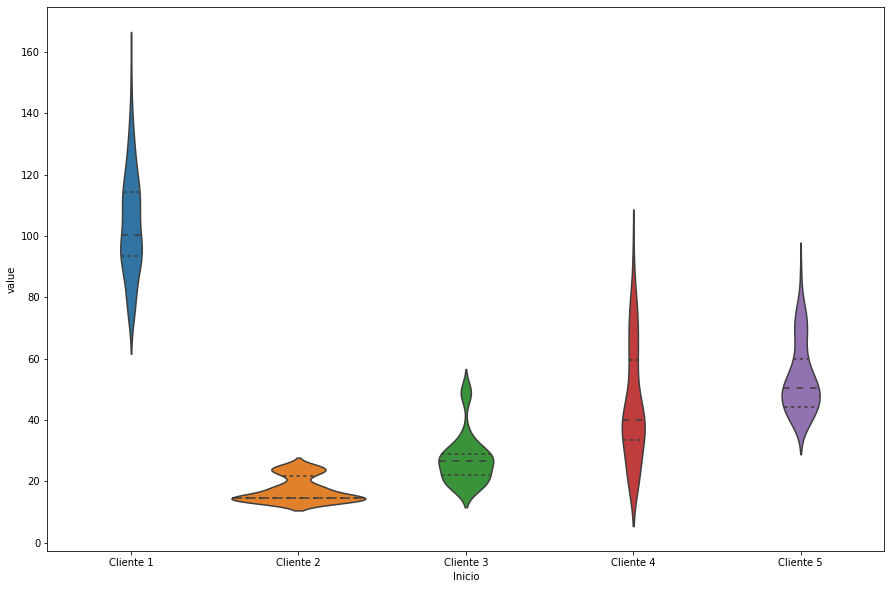

In [5]:
fig, ax= plt.subplots()
fig.set_size_inches(15,10)
sns.violinplot(x="Inicio", y="value", data=F1, kind = "violin", inner = "quartile", ax = ax);

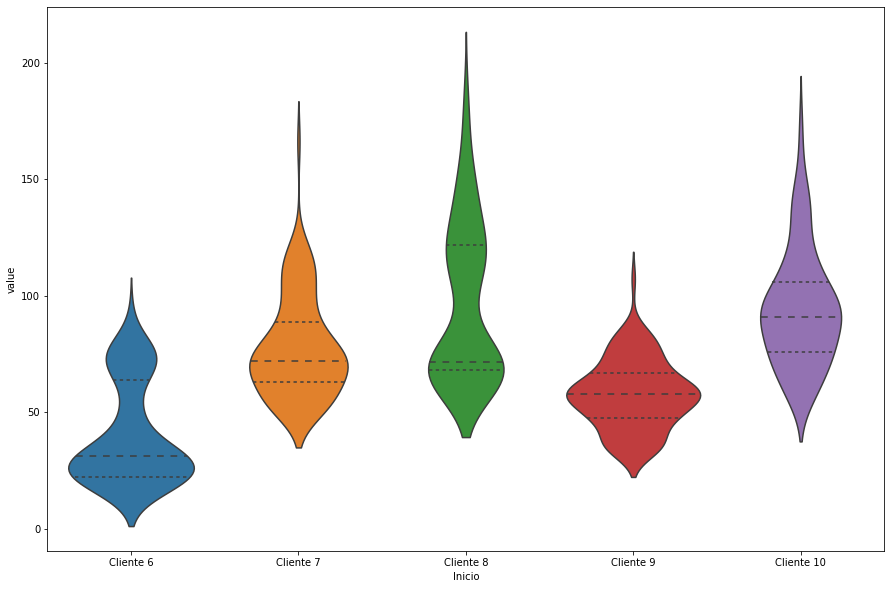

In [6]:
fig, ax= plt.subplots()
fig.set_size_inches(15,10)
sns.violinplot(x="Inicio", y="value", data=F2, kind = "violin", inner = "quartile", ax = ax);

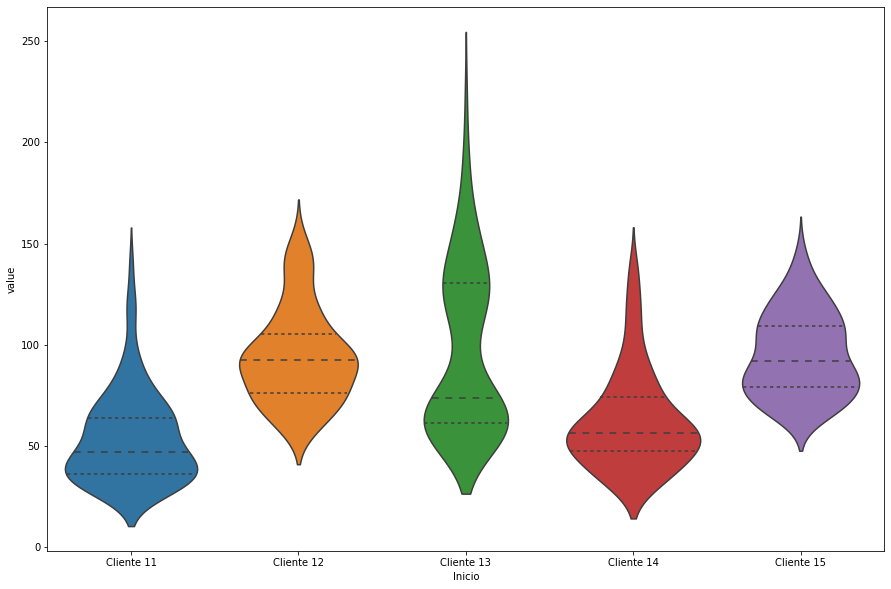

In [7]:
fig, ax= plt.subplots()
fig.set_size_inches(15,10)
sns.violinplot(x="Inicio", y="value", data=F3, kind = "violin", inner = "quartile", ax = ax);

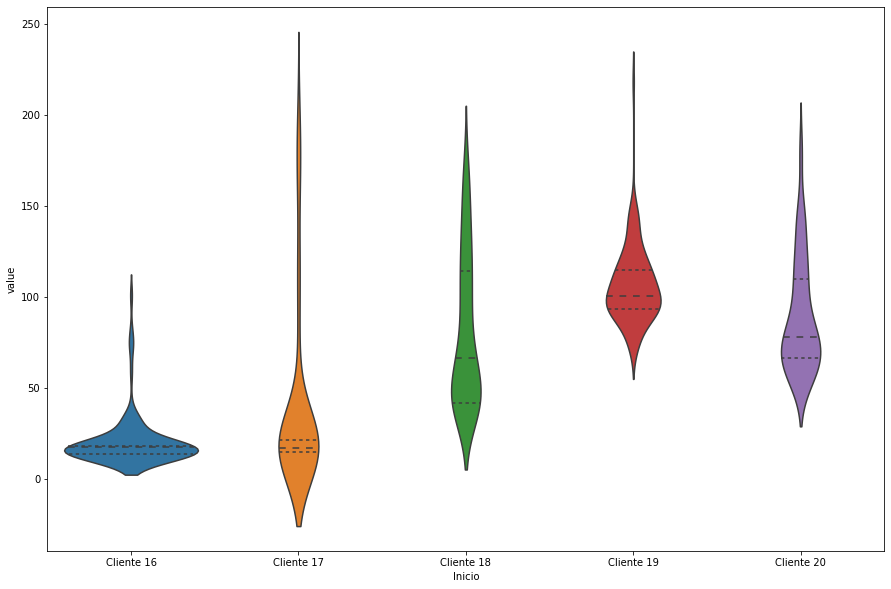

In [8]:
fig, ax= plt.subplots()
fig.set_size_inches(15,10)
sns.violinplot(x="Inicio", y="value", data=F4, kind = "violin", inner = "quartile", ax = ax);

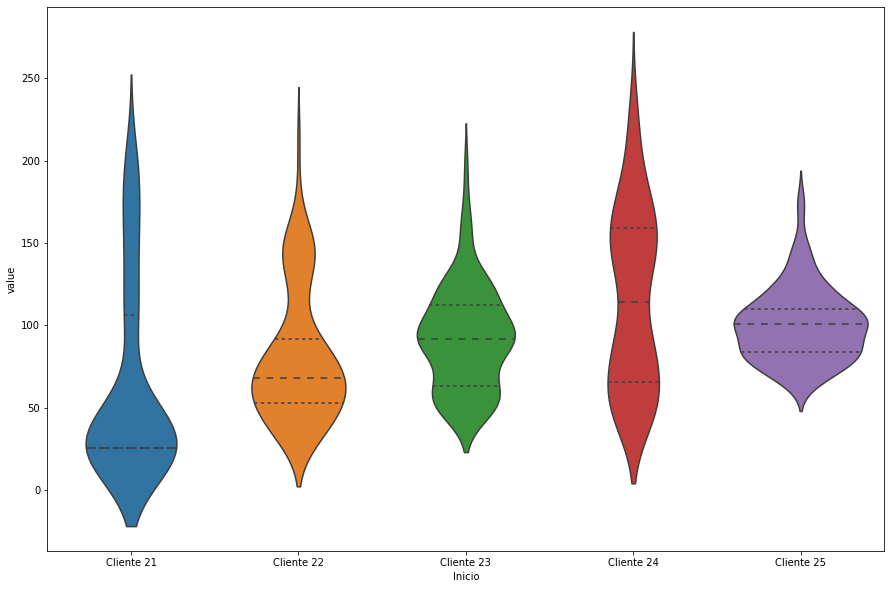

In [9]:
fig, ax= plt.subplots()
fig.set_size_inches(15,10)
sns.violinplot(x="Inicio", y="value", data=F5, kind = "violin", inner = "quartile", ax = ax);

In [10]:
def graficaHistrograma(name:str):
    data= df_melt[df_melt.Inicio.isin([name])]
    
    f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)},figsize=(12,7))
    sns.boxplot(data['value'], ax=ax[0])
    sns.swarmplot(data['value'], color='black',
              alpha = 0.5, ax=ax[0])
    ax[0].set_xlabel("",fontdict = {'fontsize':13})   
    ax[0].set_title(name, loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
    sns.distplot(data['value'], ax=ax[1])
    ax[1].axvline(np.mean(data['value']), color='red')
    plt.savefig(name+".pdf",dpi=2000)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:

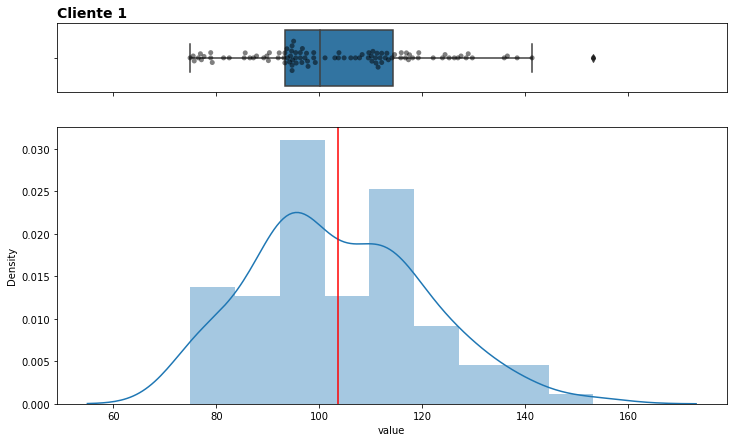

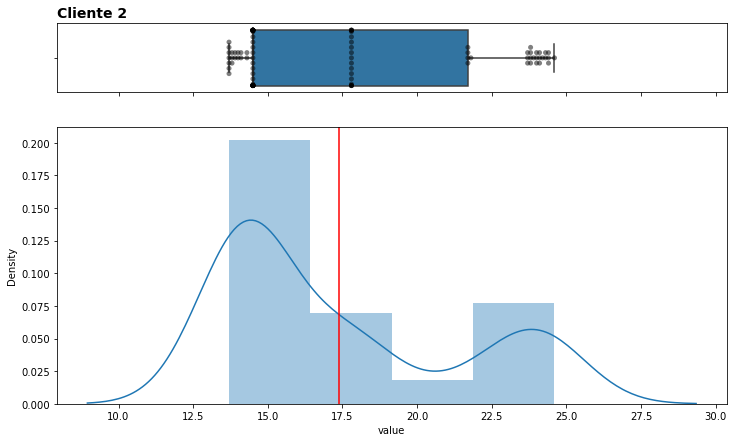

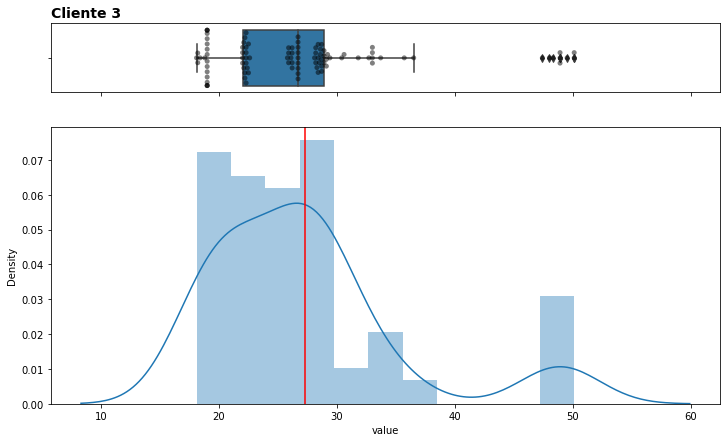

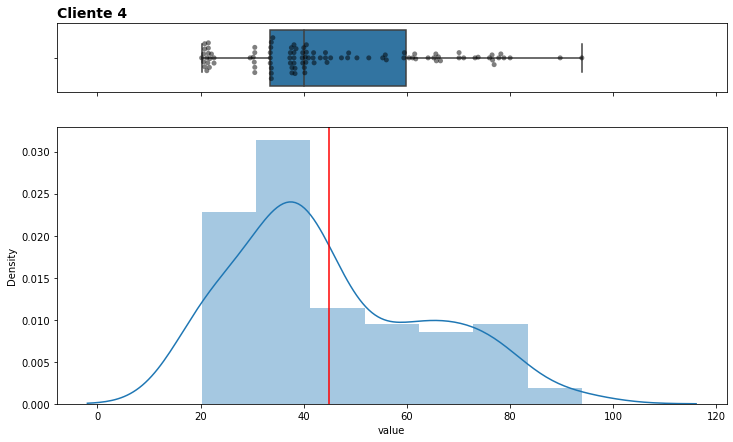

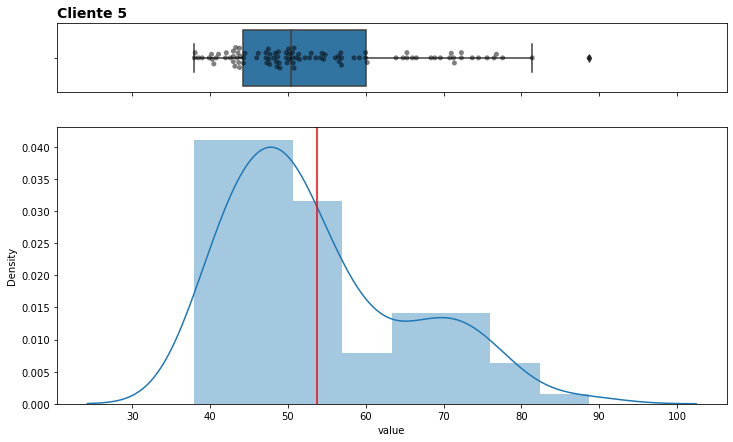

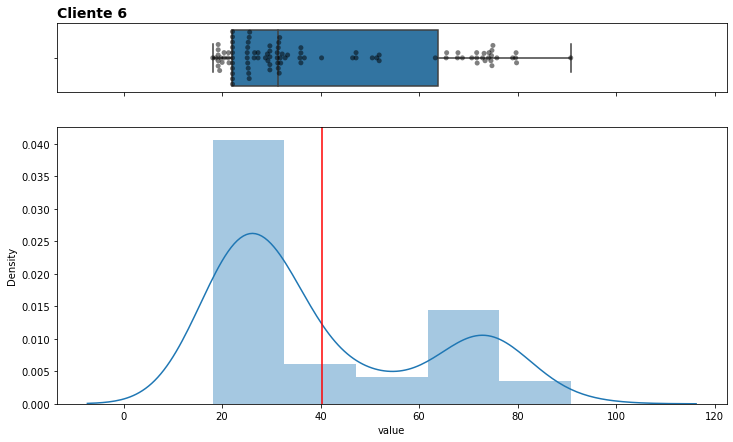

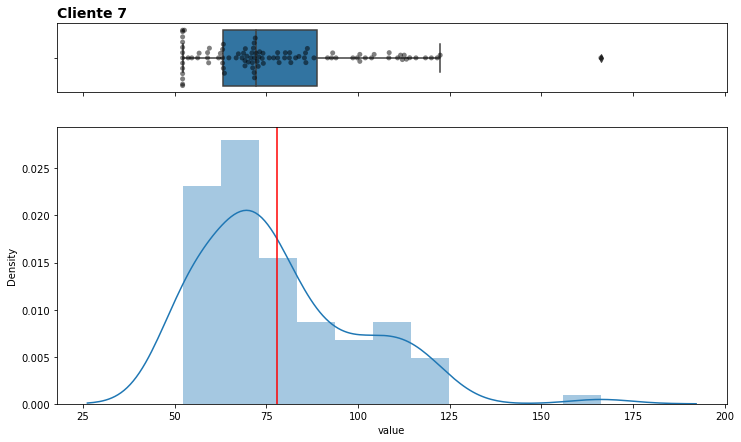

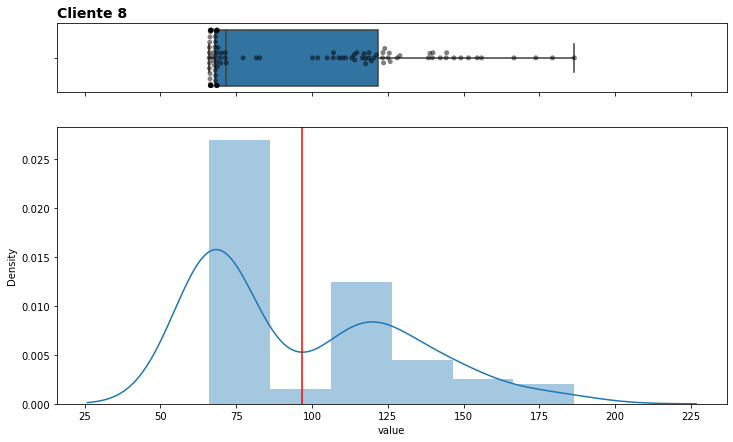

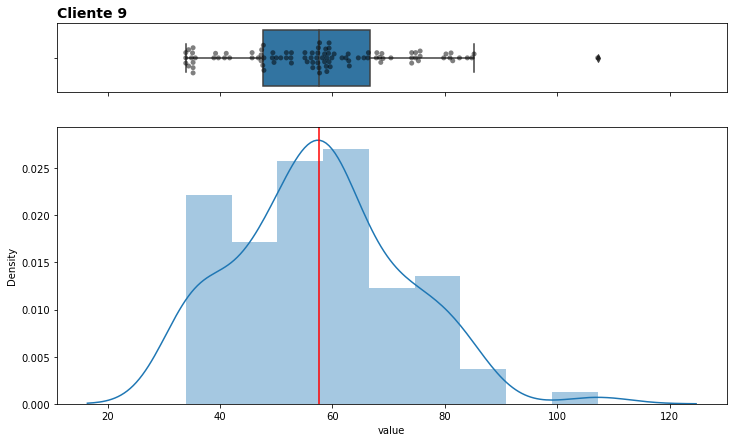

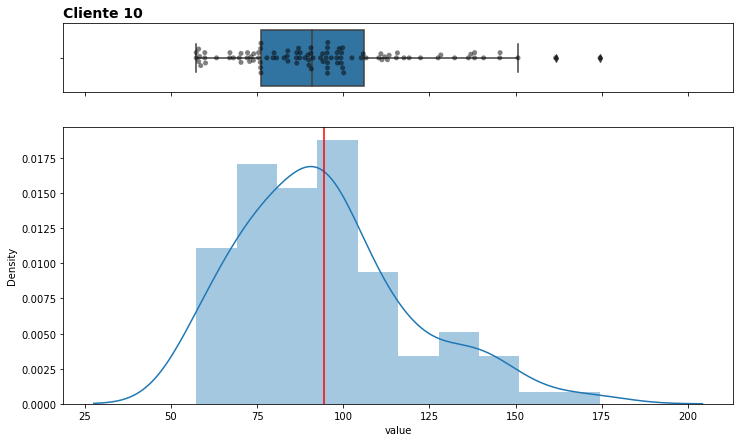

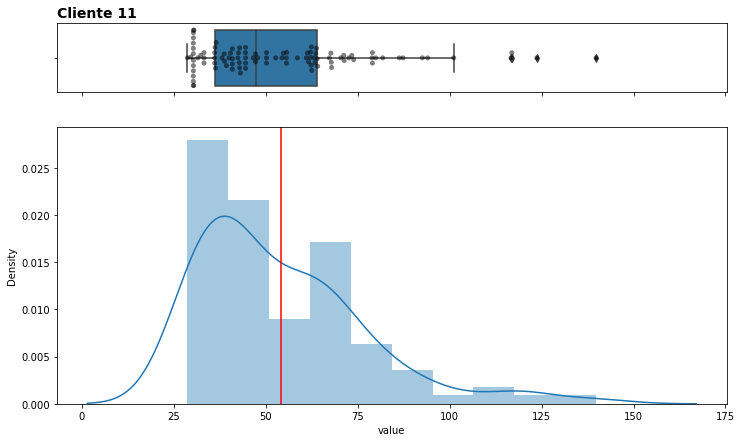

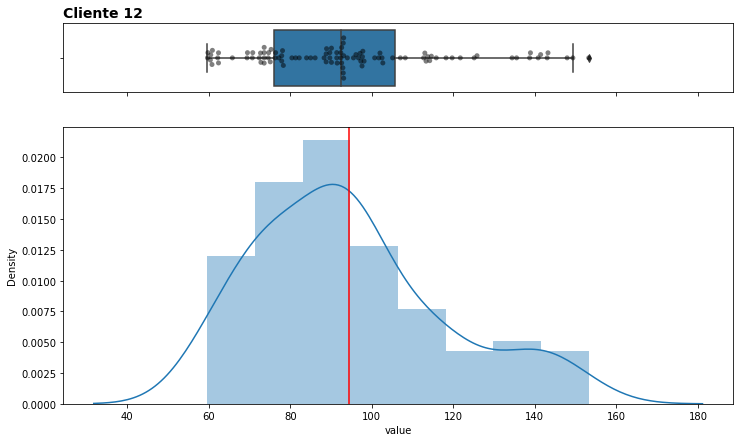

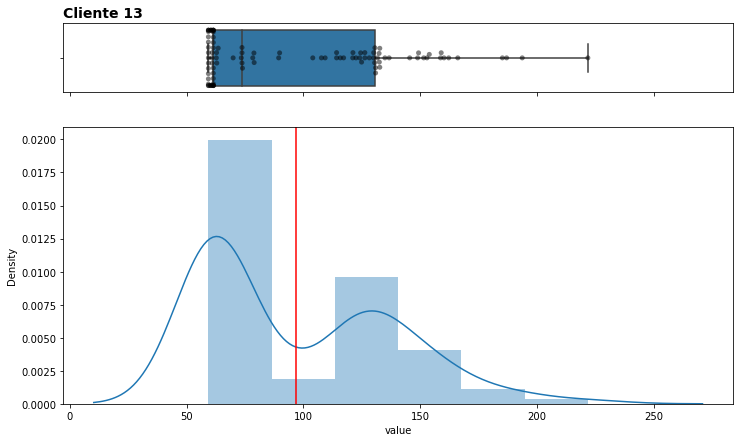

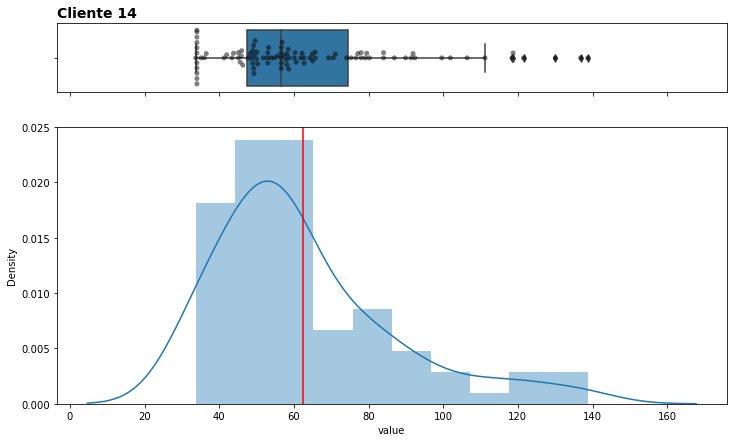

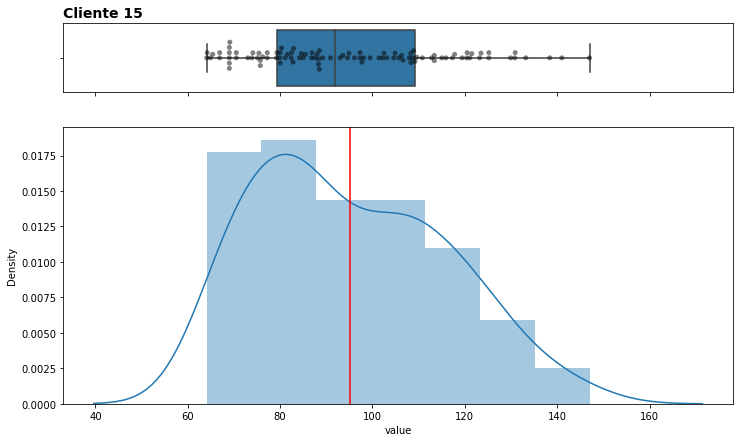

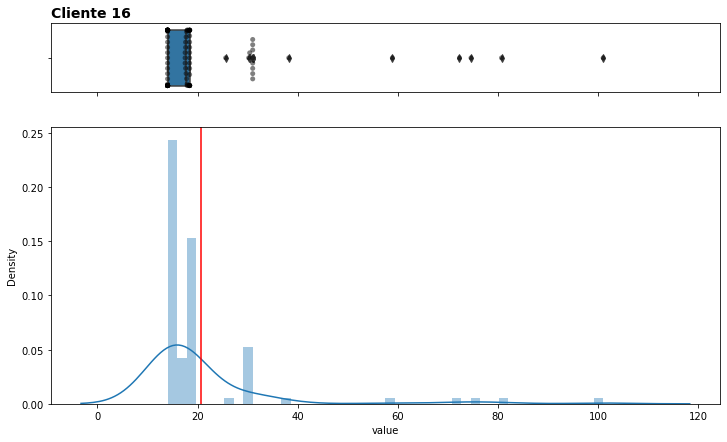

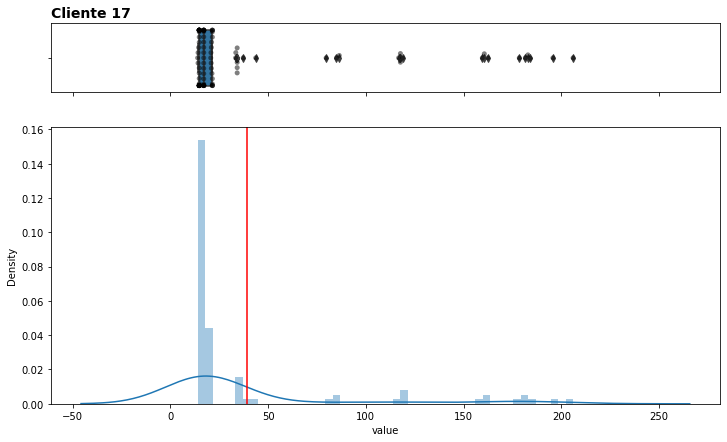

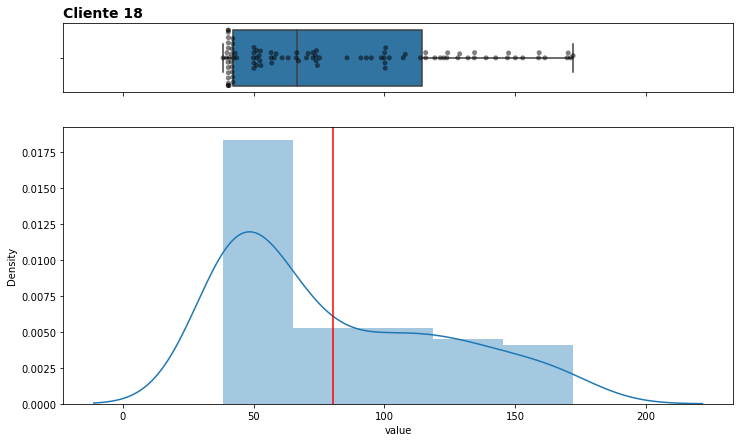

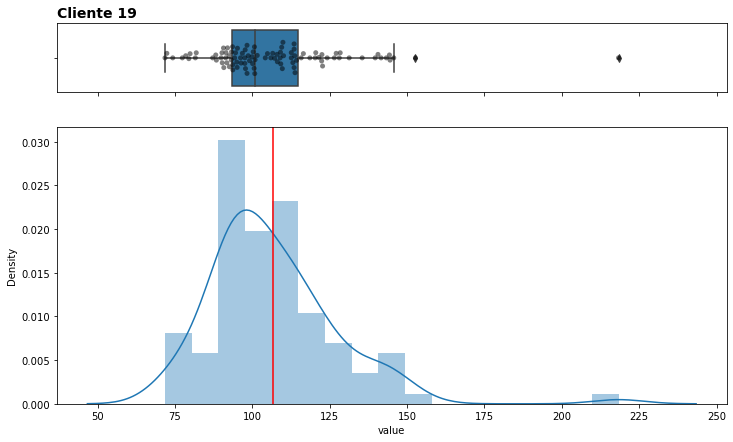

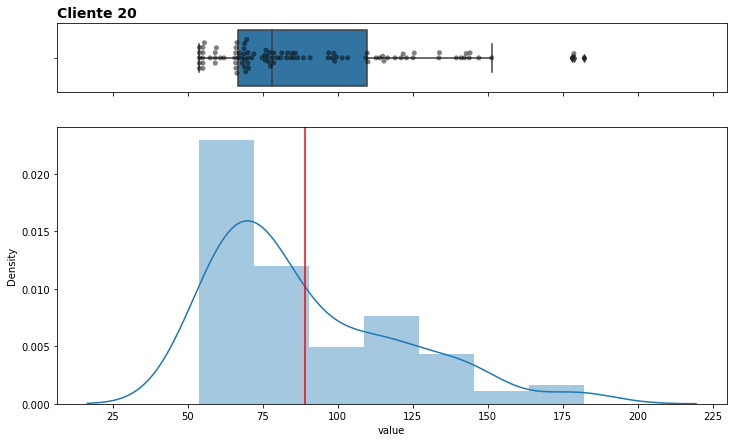

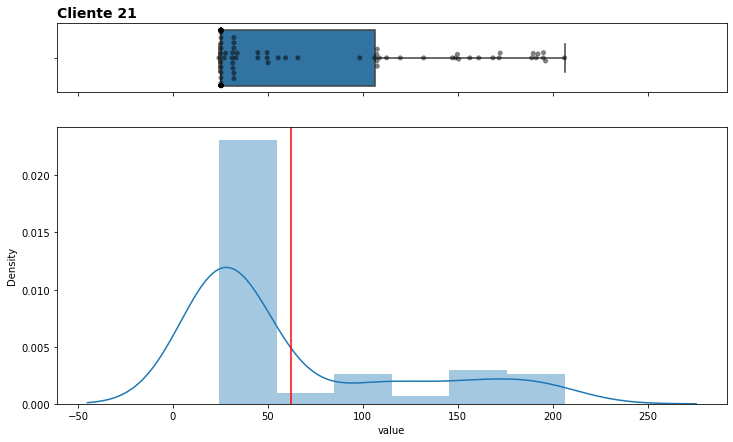

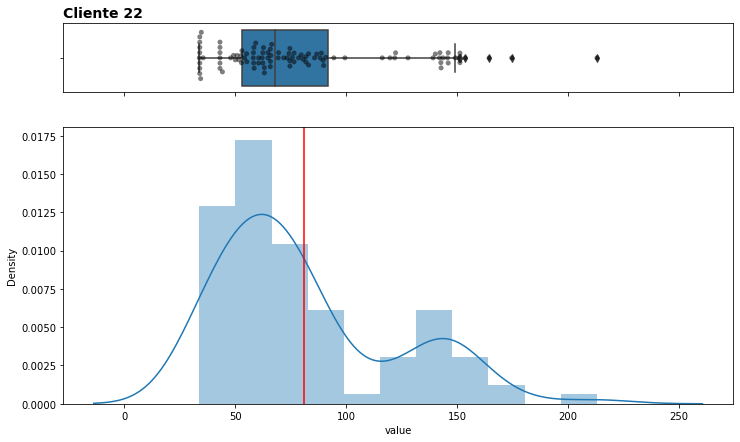

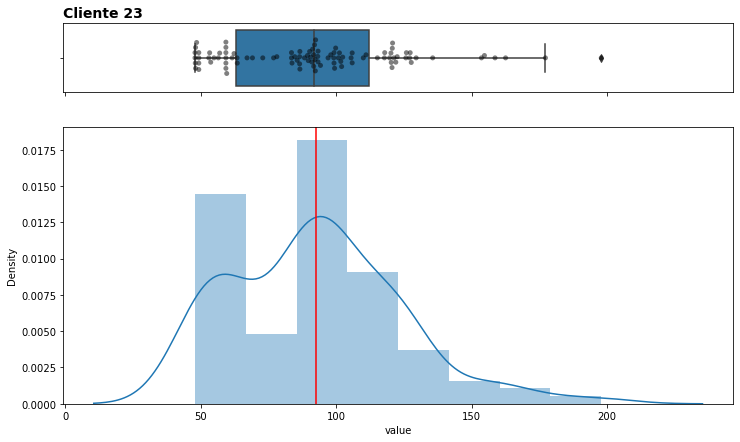

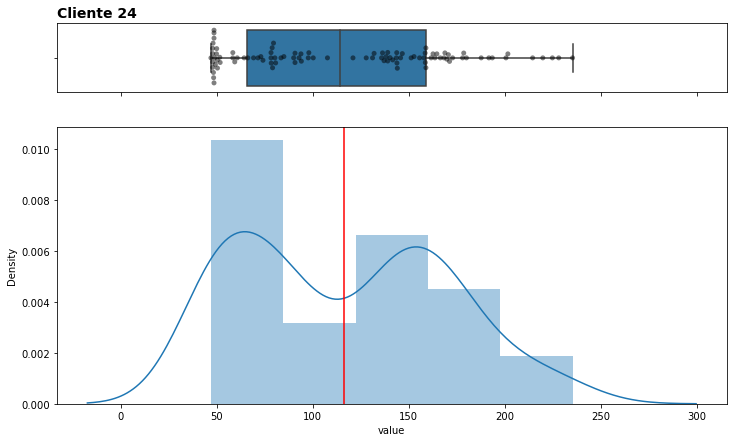

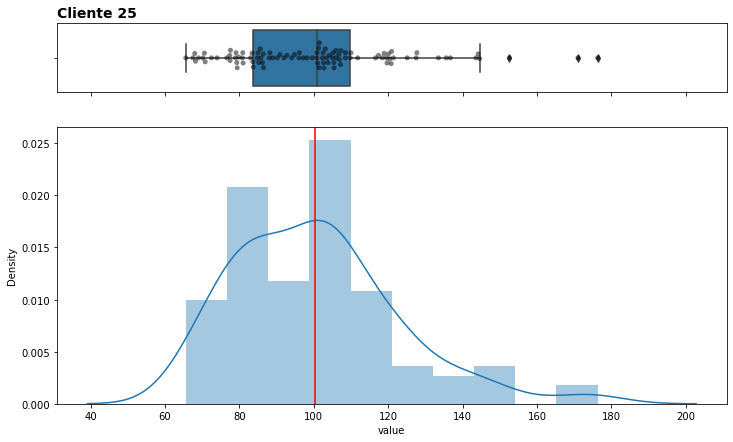

In [11]:
Clientes= ['Cliente 1','Cliente 2','Cliente 3','Cliente 4','Cliente 5','Cliente 6','Cliente 7','Cliente 8','Cliente 9','Cliente 10',
    'Cliente 11','Cliente 12','Cliente 13','Cliente 14','Cliente 15','Cliente 16','Cliente 17','Cliente 18','Cliente 19','Cliente 20',
    'Cliente 21','Cliente 22','Cliente 23','Cliente 24','Cliente 25'    
          ]
for cliente in Clientes:
    graficaHistrograma(cliente)

In [20]:
def graficarsolucion( X:list, Y:list, Names:list):
        plt.figure(figsize=(50,45))
        plt.xlabel("Eje x", fontsize=60)
        plt.ylabel("Eje y", fontsize=60)
        plt.xticks(fontsize=50)
        plt.yticks(fontsize=50)
        plt.grid()
        
        colores=['darkblue','darkgreen','darkred','aqua','crimson','orangered','lawngreen','red','gold','lime','purple','teal','yellow','deeppink']
        for n in range(len(X)):
            coord_x=X[n]
            coord_y=Y[n]
            # Scatter
            plt.scatter(x=coord_x, y=coord_y, color=colores[n], zorder=1,label="Ruta "+ str(n+1),s=500)
            # Ruta 
            for j in range(len(coord_y)-1):
                    plt.plot([coord_x[j],coord_x[j+1]],[coord_y[j],coord_y[j+1]],
                          color=colores[n], alpha=3, zorder=1, linewidth=7)
            name=Names[n]
            #Nombres 
            for n in range(len(coord_x)):
                    if(name[n]==0):
                        plt.annotate('', xy=(coord_x[n],coord_y[n] ), 
                                     xytext=(coord_x[n],coord_y[n]+0.5),color='black',size=65)
                    else:
                        plt.annotate(str(name[n]), xy=(coord_x[n],coord_y[n] ), 
                                     xytext=(coord_x[n]-0.6,coord_y[n]+0.3),color='black',size=55)
        #Agrerar localizaciín iicial
        plt.scatter(x=coord_x[0], y=coord_y[0], color='red', zorder=1,s=2300, label="Bodega",marker='s')
        
        lg=plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=70)
        plt.show()

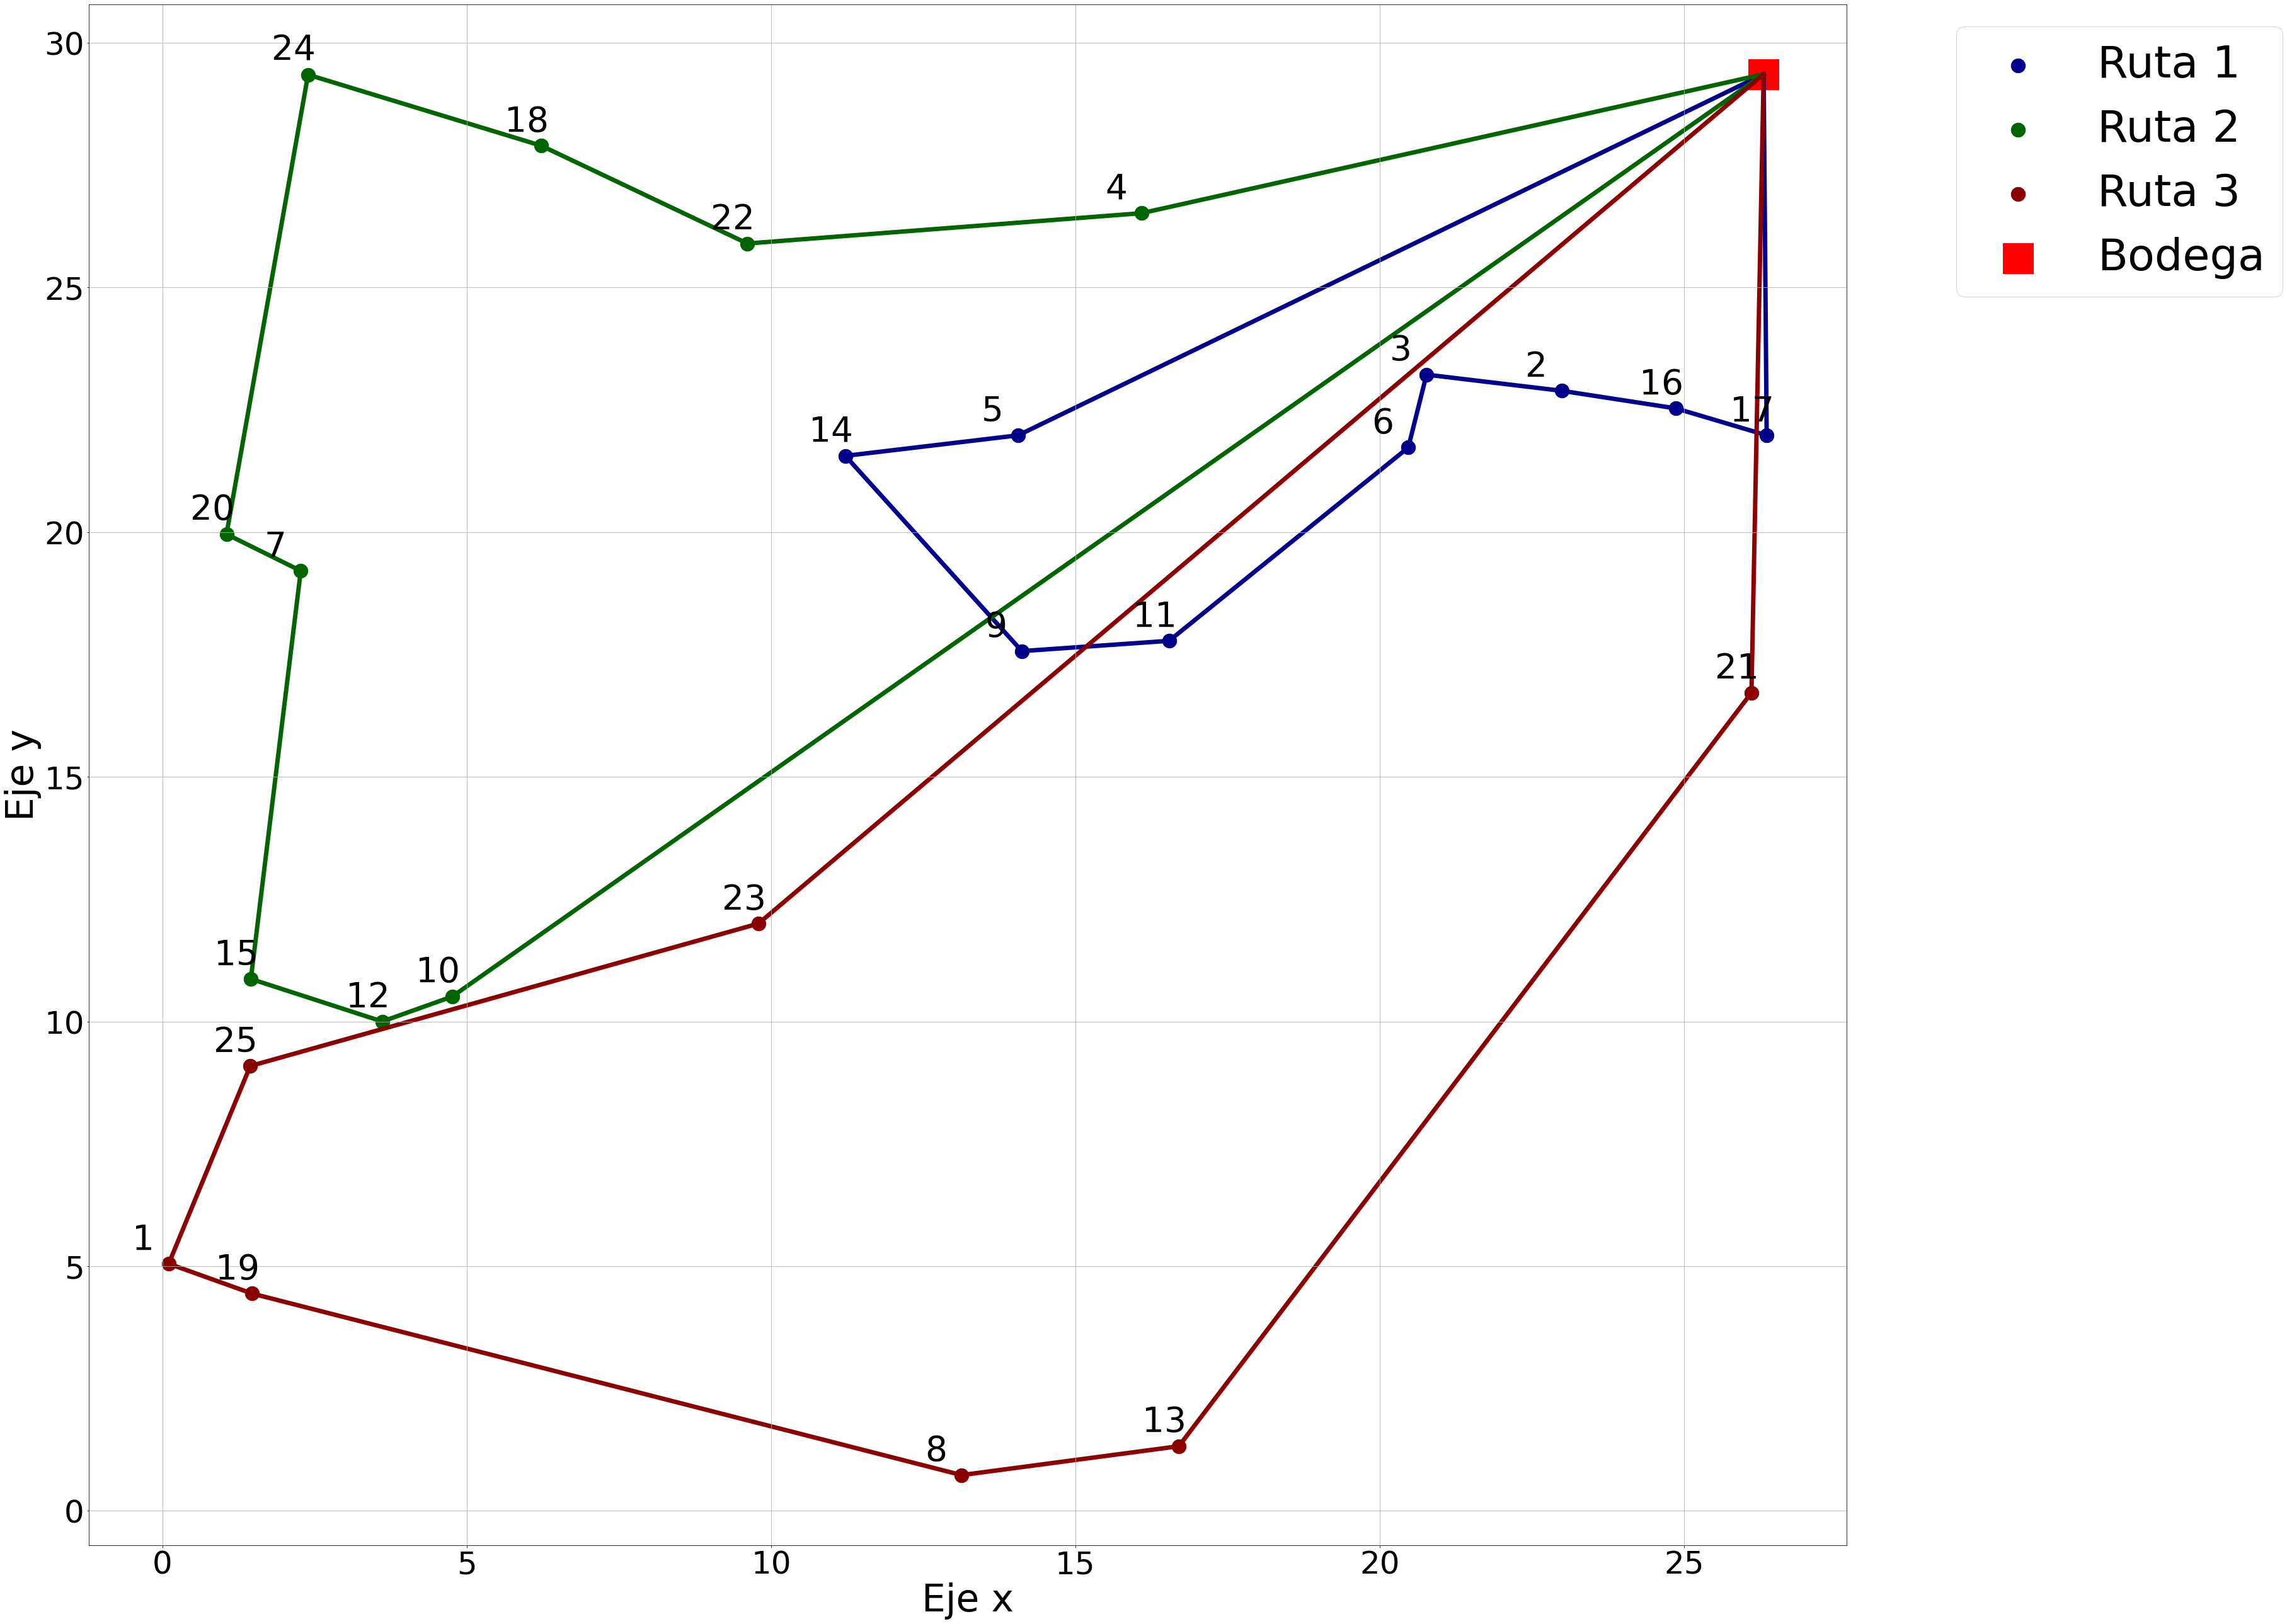

In [27]:
CordenadasX1=[26.31,
26.36,
24.87,
22.99,
20.77,
20.47,
16.54,
14.12,
11.22,
14.06,
26.31
]

CordenadasY1=[29.36,
21.98,
22.53,
22.89,
23.22,
21.73,
17.78,
17.57,
21.56,
21.98,
29.36
]

Name1=[0,
17,
16,
2,
3,
6,
11,
9,
14,
5,
0]

CordenadasX2=[26.31,
16.09,
9.61,
6.22,
2.39,
1.05,
2.27,
1.45,
3.61,
4.76,
26.31]

CordenadasY2=[29.36,
26.52,
25.9,
27.9,
29.35,
19.96,
19.21,
10.87,
10,
10.51,
29.36]

Name2=[0,
4,
22,
18,
24,
20,
7,
15,
12,
10,
0]

CordenadasX3=[26.31,
26.11,
16.7,
13.13,
1.47,
0.1,
1.44,
9.79,
26.31]

CordenadasY3=[29.36,
16.72,
1.32,
0.73,
4.44,
5.05,
9.09,
12,
29.36]

Name3=[0,
21,
13,
8,
19,
1,
25,
23,
0]

X=[]
Y=[]
X.append(CordenadasX1)
X.append(CordenadasX2)
X.append(CordenadasX3)
Y.append(CordenadasY1)
Y.append(CordenadasY2)
Y.append(CordenadasY3)
Names=[Name1,Name2,Name3]
graficarsolucion(X,Y,Names)